<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase6_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 6 (Miércoles 2 de abril, 2025)
---


**5. Matrices ortogonales**

Son matrices **cuadradas** con columnas ortonormales:  
$$Q^TQ=\textrm{Id_n}.$$
Observar que para matrices cuadradas:  
$$
Q^T Q = I \quad \Rightarrow \quad Q^T = Q^{-1}
$$

- Las columnas forman una base ortonormal de $\mathbb{R}^n$.
- Las filas también forman otra base ortonormal (posiblemente distinta).
- El nombre "matriz ortogonal" debería ser "matriz ortonormal".

### Base ortogonal = Ejes ortogonales en $\mathbb{R}^n$

Supongamos que una matriz ortogonal $n \times n$ tiene como columnas a los vectores unitarios $q_1, \dots, q_n$.  
Estos vectores forman una **base ortonormal** del espacio $\mathbb{R}^n$.  
Entonces, cualquier vector $\mathbf{v}$ puede escribirse como una combinación lineal de estos vectores base:

$$
\mathbf{v} = c_1 \mathbf{q}_1 + \cdots + c_n \mathbf{q}_n
\qquad(1)
$$

Los coeficientes $c_1, c_2, \dots, c_n$ son las **componentes** de $\mathbf{v}$ en la dirección de cada vector base.  
¡Son las proyecciones ortogonales de $\mathbf{v}$ sobre cada eje!  
Y hay una fórmula sencilla para calcularlos:

---

#### Coeficientes en una base ortonormal:

$$
c_1 = \mathbf{q}_1^T \mathbf{v}, \quad
c_2 = \mathbf{q}_2^T \mathbf{v}, \quad \dots, \quad
c_n = \mathbf{q}_n^T \mathbf{v}
$$

---

Demostración:  
Toma el producto punto con $\mathbf{q}_1$ en la ecuación (13):

$$
\mathbf{q}_1^T \mathbf{v} = c_1 \mathbf{q}_1^T \mathbf{q}_1 + c_2 \mathbf{q}_1^T \mathbf{q}_2 + \cdots + c_n \mathbf{q}_1^T \mathbf{q}_n = c_1
$$

Todos los términos excepto el primero son cero, ya que $\mathbf{q}_1^T \mathbf{q}_j = 0$ para $j \ne 1$  
(y $\mathbf{q}_1^T \mathbf{q}_1 = 1$).  
Así que: $\mathbf{q}_1^T \mathbf{v} = c_1$ y en general $\mathbf{q}_i^T \mathbf{v} = c_i$.

---

Si escribimos (1) como ecuación matricial: $\mathbf{v} = Q \mathbf{c}$,  
multiplicamos por $Q^T$ para ver la fórmula (14):

$$
Q^T \mathbf{v} = Q^T Q \mathbf{c} = \mathbf{c}
$$

Esto da **todos los coeficientes a la vez**:

$$
\mathbf{c} = Q^T \mathbf{v}
$$

**Ejercicio:** Si $Q$ no fuera ortogonal, i.e. los vectores en (1) son una base arbitraria de $\mathbb{R}^n$. Cómo se calcularían los coeficientes de $\textbf{v}$ en esa base?
(Más abajo está la respuesta.)
---

> Esta es una idea clave en bases ortogonales (por ejemplo, para series de Fourier):  
Cuando los vectores base son ortonormales, **cada coeficiente se encuentra por separado** fácilmente.



---


### Ejemplo en Julia: Cálculo de los coeficientes $c_i$ usando una base ortonormal

Dado un conjunto de vectores ortonormales (columnas de $Q$), cualquier vector $\mathbf{v}$ puede escribirse como:

$$
\mathbf{v} = Q \mathbf{c}, \quad \text{donde} \quad \mathbf{c} = Q^T \mathbf{v}
$$

Esto significa que los coeficientes $c_i$ son simplemente las proyecciones ortogonales de $\mathbf{v}$ sobre cada eje base.

A continuación, un ejemplo en Julia.


In [ ]:
using LinearAlgebra

# Definir una base ortonormal Q (matriz 3x3 ortogonal)
Q = (1/3) * [2 2 -1;
             2 -1 2;
            -1 2 2]


3×3 Matrix{Float64}:
  0.666667   0.666667  -0.333333
  0.666667  -0.333333   0.666667
 -0.333333   0.666667   0.666667

In [ ]:
# Verificamos que es ortonormal
Q'*Q

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [ ]:
# Definir un vector v
v = [3.0, 1.0, -2.0]

# Calcular los coeficientes c = Q^T * v
c = Q' * v

3-element Vector{Float64}:
  3.333333333333333
  0.33333333333333326
 -1.6666666666666665

In [ ]:
# Reconstruir v como combinación de columnas de Q
v_reconstruido = Q * c

println("\nCoeficientes c:")
println(c)

println("\nReconstrucción de v = Q * c:")
println(v_reconstruido)

println("\n¿v original ≈ v reconstruido?")
println(v ≈ v_reconstruido)



Coeficientes c:
[3.333333333333333, 0.33333333333333326, -1.6666666666666665]

Reconstrucción de v = Q * c:
[2.9999999999999996, 0.9999999999999998, -1.9999999999999998]

¿v original ≈ v reconstruido?
true


### Comparación: Base no ortonormal

Si usamos una base **no ortonormal**, ya no podemos calcular los coeficientes $c_i$ con la simple fórmula:

$$
\mathbf{c} = Q^T \mathbf{v}
$$

En cambio, debemos resolver el sistema lineal:

$$
Q \mathbf{c} = \mathbf{v}
$$

porque las columnas de $Q$ no son ortonormales. Eso puede requerir invertir o pseudo-invertir la matriz $Q$.

A continuación, un ejemplo en Julia.


In [ ]:
# Definir una base NO ortonormal (columnas no perpendiculares ni unitarias)
Q = [1.0 1.0 0.0;
     1.0 2.0 1.0;
     0.0 1.0 2.0]

3×3 Matrix{Float64}:
 1.0  1.0  0.0
 1.0  2.0  1.0
 0.0  1.0  2.0

In [ ]:
# Verificamos que Q no es ortonormal
println("Q^T * Q ≈ I?")
println(Q' * Q ≈ I)

Q^T * Q ≈ I?
false


In [ ]:
md# Vector objetivo
v = [2.0, 3.0, 1.0]

3-element Vector{Float64}:
 2.0
 3.0
 1.0

In [ ]:
# Resolver Q * c = v para obtener los coeficientes
# Usamos el operador \ que resuelve sistemas lineales
c = Q \ v


3-element Vector{Float64}:
 1.0
 1.0
 0.0

In [ ]:

# Reconstruimos v como combinación de columnas de Q
v_reconstruido = Q * c


3-element Vector{Float64}:
 2.0
 3.0
 1.0

In [ ]:
println("\nCoeficientes c (base no ortonormal):")
println(c)

println("\nReconstrucción de v = Q * c:")
println(v_reconstruido)

println("\n¿v original ≈ v reconstruido?")
println(v ≈ v_reconstruido)



Coeficientes c (base no ortonormal):


LoadError: UndefVarError: `c` not defined

---

Con esto terminamos una descricipción de distintas aplicaciones de ortogonalidad. Veamos un ejercicio una aplicación más.

---

**Ejercicio:** Consderemos un vector $v\in\mathbb{R}^n$, tal que $\|v\|=1$.
1. Quién es el operador $\textrm{Id}-vv^T$?
2. Probar que existe $Q$ de Stiefel tal que $QQ^T=\textrm{Id}-vv^T$.
3. Qué operación geométrica hace $\textrm{Id}-2vv^T$

---

### Aplicación de Householder:

Una matriz de Householder $H$ es una matriz ortogonal y simétrica que refleja vectores respecto a un hiperplano. Se define por un vector unitario $v$ como:
$$
H=\textrm{Id}−2vv^T.
$$

donde:
$v$ es un vector unitario ($\|v\| = 1$).

Esta matriz se usa en algoritmos numéricos como la descomposición QR para hacer ceros debajo de la diagonal en una matriz.

Propiedades:

$H^T = H$ (simétrica)

$H^T H = \textrm{Id}$ (ortogonal)

$H$ es la identidad en $v^\perp$, y $Hv=-v$.

$H^2 = \textrm{Id}$ (involutiva: aplicar dos veces da la identidad)

### Implementemos en Julia



In [ ]:
using LinearAlgebra
using Plots

# Devuelve la matriz de Householder que refleja respecto al hiperplano ortogonal a `v`.
function householder_matrix(v::Vector)
    v = v / norm(v)  # normalización
    n = length(v)
   # I = Matrix{Float64}(I, n, n)  # matriz identidad explícita
    return I - 2 * (v * v')
end

householder_matrix (generic function with 1 method)

In [ ]:
# Ejemplo: reflejamos un vector u respecto a un plano ortogonal a v
u = 2*[1.0, 2.0]
v = [1.0, -1.0]

2-element Vector{Float64}:
  1.0
 -1.0

In [ ]:
H = householder_matrix(v)
u_reflejado = H * u

2-element Vector{Float64}:
 3.9999999999999996
 2.0000000000000004

Vector original u: [2.0, 4.0]
Vector reflejado H*u: [3.9999999999999996, 2.0000000000000004]


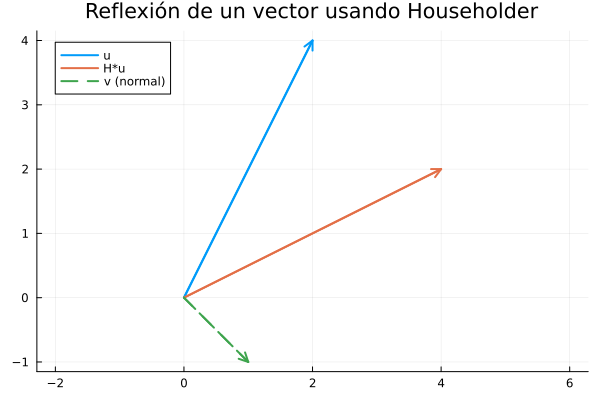

In [ ]:
#Veamos un gráfico
println("Vector original u: ", u)
println("Vector reflejado H*u: ", u_reflejado)

plot([0, u[1]], [0, u[2]], label="u", lw=2, arrow=:arrow, legend=:topleft)
plot!([0, u_reflejado[1]], [0, u_reflejado[2]], label="H*u", lw=2, arrow=:arrow)
plot!([0, v[1]], [0, v[2]], label="v (normal)", lw=2, linestyle=:dash, arrow=:arrow)
plot!(aspect_ratio=:equal, grid=:on, title="Reflexión de un vector usando Householder")



---